In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from source import layers, losses
from source.model import Model
from source.utils import batch_data, training_step, testing_step

In [2]:
full_data = pd.read_csv('data/2024_ionosphere_data.csv', header=None)

full_data['is_good'] = full_data[34].apply(lambda x: 1 if x == 'g' else 0)
full_data = full_data.drop(34, axis=1)

full_data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,is_good
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [3]:
dataset = np.array(full_data)
np.random.default_rng().shuffle(dataset)

train_ratio = 0.8
train_size = int(len(dataset) * train_ratio)

X_train = dataset[:train_size, :-1]
X_test = dataset[train_size:, :-1]
y_train = dataset[:train_size, -1:]
y_test = dataset[train_size:, -1:]

In [4]:
in_features = X_train.shape[1]
# print(in_features)
out_features = 8

model = Model([
    layers.Linear(in_features, out_features),
    layers.Sigmoid(),
    layers.Linear(out_features, 2),
    layers.Sigmoid(),
    layers.Linear(2, 1),
    layers.Sigmoid(),
])

bce = losses.BinaryCrossEntropy()

In [11]:
def plot_latent_2d(model, feature, target, epoch):
    model(feature)
    latent = model.layers[-2].inputs
    latent_good = latent[target[:, 0] == 1]
    latent_bad = latent[target[:, 0] == 0]
    # plt.clf()
    plt.scatter(latent_good[:, 0], latent_good[:, 1], color='blue', label='good')
    plt.scatter(latent_bad[:, 0], latent_bad[:, 1], color='red', label='bad')
    plt.legend()
    plt.title(f'2D Feature {epoch} epoch')
    plt.show()

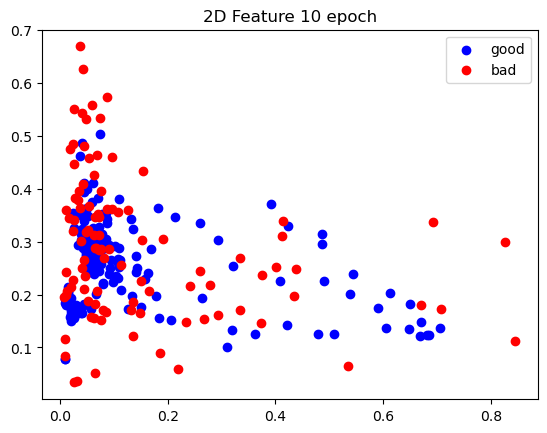

Epoch 999:
train loss 0.3318561762990613, test loss 0.355551672663377
Epoch 1999:
train loss 0.17422203667928368, test loss 0.2352827792630277
Epoch 2999:
train loss 0.10665825146095094, test loss 0.19010975202067165
Epoch 3999:
train loss 0.07356544291595682, test loss 0.1744710573662721
Epoch 4999:
train loss 0.0628069872069577, test loss 0.17610466198594754
Epoch 5999:
train loss 0.05687963080312464, test loss 0.18154105360628162
Epoch 6999:
train loss 0.052838109567698154, test loss 0.18864033138004244
Epoch 7999:
train loss 0.05000331891856124, test loss 0.1956776487954437
Epoch 8999:
train loss 0.04795386103595852, test loss 0.20223079962243248
Epoch 9999:
train loss 0.04636644973129832, test loss 0.2092830312128084
Epoch 10999:
train loss 0.044909328017233276, test loss 0.21822116014113607


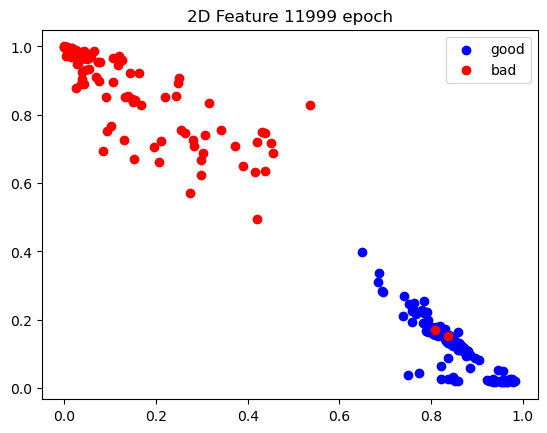

Epoch 11999:
train loss 0.04285677616188626, test loss 0.232775760491287


In [6]:
epochs = 12000
batch_size = 64
learning_rate = 0.03

train_losses =[]
test_losses = []
for epoch in range(epochs):

    train_iter_losses =[]
    test_iter_losses = []
    for x, y in batch_data(X_train, y_train, batch_size):
        train_loss = training_step(x, y, model, bce, learning_rate=learning_rate)

        outputs = model(x)
        outputs[outputs > 0.5] = 1
        outputs[outputs <= 0.5] = 0
        train_iter_losses.append(train_loss * len(x))
    train_losses.append(np.sum(train_iter_losses) / len(X_train))

    for x, y in batch_data(X_test, y_test, batch_size):
        test_loss = testing_step(x, y, model, bce)

        outputs = model(x)
        outputs[outputs > 0.5] = 1
        outputs[outputs <= 0.5] = 0
        test_iter_losses.append(test_loss * len(x))
    test_losses.append(np.sum(test_iter_losses) / len(X_test))

    if epoch == 10 or (epoch + 1) == epochs:
        plot_latent_2d(model, X_train, y_train, epoch)
        plt.show() 
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch {epoch}:\n'
              f'train loss {train_losses[-1]}, test loss {test_losses[-1]}')

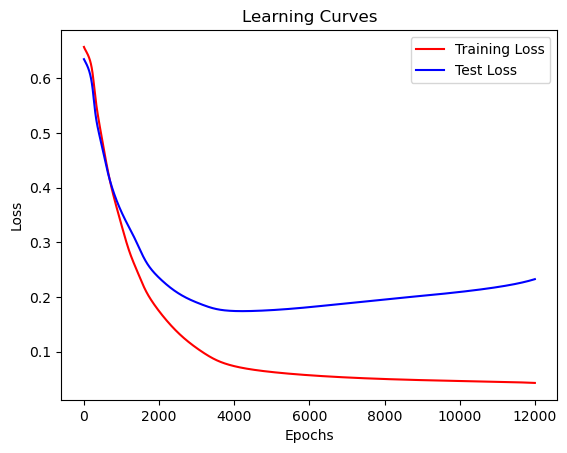

In [7]:
plt.plot(train_losses, label='Training Loss', color='red')
plt.plot(test_losses, label='Test Loss',  color='blue')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

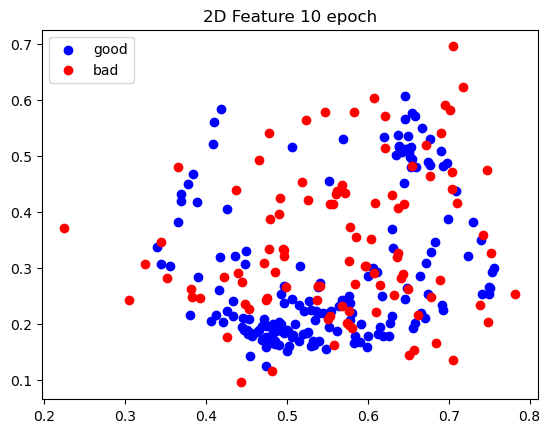

Epoch 999:
train loss 0.24747658783843046, test loss 0.26233223512606607
Epoch 1999:
train loss 0.10143390952395978, test loss 0.13771541612196447
Epoch 2999:
train loss 0.061810592244374796, test loss 0.12051535562926512
Epoch 3999:
train loss 0.04598188064500199, test loss 0.12385128484030916
Epoch 4999:
train loss 0.03723064424750221, test loss 0.13390044926743735
Epoch 5999:
train loss 0.03166793749905687, test loss 0.14541243444797375
Epoch 6999:
train loss 0.027801684107039742, test loss 0.15631020891796196
Epoch 7999:
train loss 0.024848133396530022, test loss 0.16626786983905006
Epoch 8999:
train loss 0.02238960934854244, test loss 0.1754503955617927
Epoch 9999:
train loss 0.020198971793111826, test loss 0.18406327829762156
Epoch 10999:
train loss 0.018146214703761123, test loss 0.19223450291786556


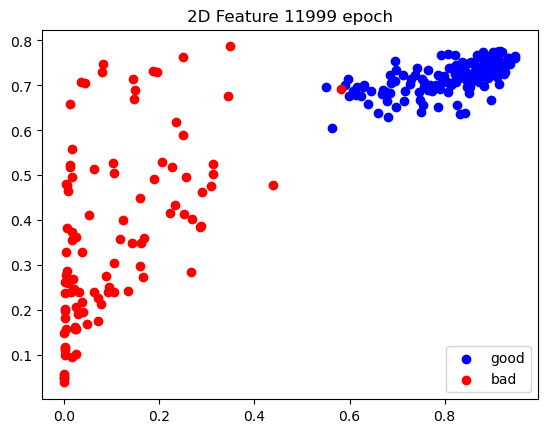

Epoch 11999:
train loss 0.016158452099202553, test loss 0.19999137390240407


In [8]:
model = Model([
    layers.Linear(in_features, out_features),
    layers.Sigmoid(),
    layers.Linear(out_features, 3),
    layers.Sigmoid(),
    layers.Linear(3, 1),
    layers.Sigmoid(),
])

train_losses = []
test_losses = []
for epoch in range(epochs):
    train_iter_losses=[]
    test_iter_losses = []
    for x, y in batch_data(X_train, y_train, batch_size):
        train_loss = training_step(x, y, model, bce, learning_rate=learning_rate)

        outputs = model(x)
        outputs[outputs > 0.5] = 1
        outputs[outputs <= 0.5] = 0
        train_iter_losses.append(train_loss * len(x))
    train_losses.append(np.sum(train_iter_losses) / len(X_train))

    for x, y in batch_data(X_test, y_test, batch_size):
        test_loss = testing_step(x, y, model, bce)

        outputs = model(x)
        outputs[outputs > 0.5] = 1
        outputs[outputs <= 0.5] = 0
        test_iter_losses.append(test_loss * len(x))
    test_losses.append(np.sum(test_iter_losses) / len(X_test))

    if epoch == 10 or (epoch + 1) == epochs:
        plot_latent_2d(model, X_train, y_train, epoch)
        plt.show() 

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch {epoch}:\n'
              f'train loss {train_losses[-1]}, test loss {test_losses[-1]}')

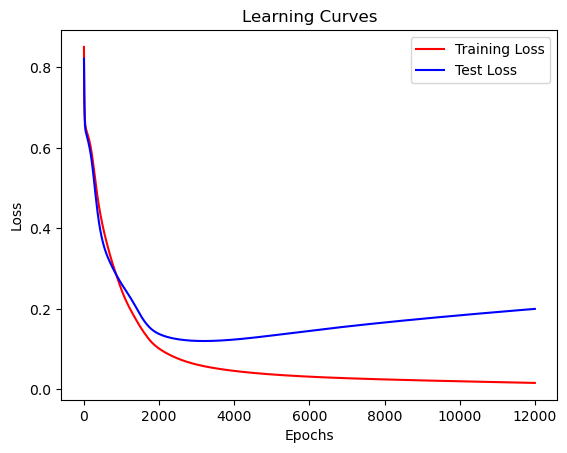

In [9]:
plt.plot(train_losses, label='Training Loss', color='red')
plt.plot(test_losses, label='Test Loss',  color='blue')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()